In [1]:
import geopandas as gp
import matplotlib.pyplot as plt

In [3]:
hydrotas = gp.read_file('HydroTas_shpFiles/All_SubAreas.shp')

In [4]:
hydrotas

,Area_sqkm,CentrLat,CentrLong,Storage,SLEIPSYS,ModelID,ModelName,CatchName,CatchID,geometry
0,8.742642,-41.631231,146.255949,N,Mersey Forth,18,MF_Mersey,PARANGANA LAKE,594,"POLYGON Z ((440719.477 5393034.065 0.000, 4407..."
1,8.049537,-41.715322,146.416183,N,Mersey Forth,19,MF_FisherMackenzie,MACKENZIE LAKE,629,"POLYGON Z ((451049.051 5383905.749 0.000, 4517..."
2,24.129273,-41.777048,146.190484,N,Mersey Forth,18,MF_Mersey,ROWALLAN LAKE,562,"POLYGON Z ((434493.882 5379996.857 0.000, 4344..."
3,11.544470,-41.938414,146.148012,N,Mersey Forth,18,MF_Mersey,ROWALLAN LAKE,562,"POLYGON Z ((432498.893 5358271.045 0.000, 4325..."
4,14.870305,-41.896406,146.236918,N,Mersey Forth,18,MF_Mersey,ROWALLAN LAKE,562,"POLYGON Z ((436394.330 5359789.842 0.000, 4364..."
...,...,...,...,...,...,...,...,...,...,...
558,1.884019,-42.481220,146.728297,N,Derwent,10,DE_Derwent,MEADOWBANK LAKE,565,"POLYGON Z ((478998.202 5296993.151 0.000, 4788..."
559,7.258905,-42.485641,146.670230,N,Derwent,10,DE_Derwent,MEADOWBANK LAKE,565,"POLYGON Z ((474845.551 5295302.959 0.000, 4746..."
560,3.353412,-41.845106,145.577324,N,Pieman Anthony,28,PA_Anthony,PIEMAN LAKE,286,"POLYGON Z ((380832.239 5366387.674 0.000, 3810..."
561,1.760424,-41.818456,145.618560,N,Pieman Anthony,28,PA_Anthony,PLIMSOLL LAKE,294,"POLYGON Z ((385209.399 5370498.506 0.000, 3852..."


In [5]:
hydrotas.crs

<Projected CRS: EPSG:28355>
Name: GDA94 / MGA zone 55
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore and offshore between 144°E and 150°E.
- bounds: (144.0, -50.89, 150.01, -9.23)
Coordinate Operation:
- name: Map Grid of Australia zone 55
- method: Transverse Mercator
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

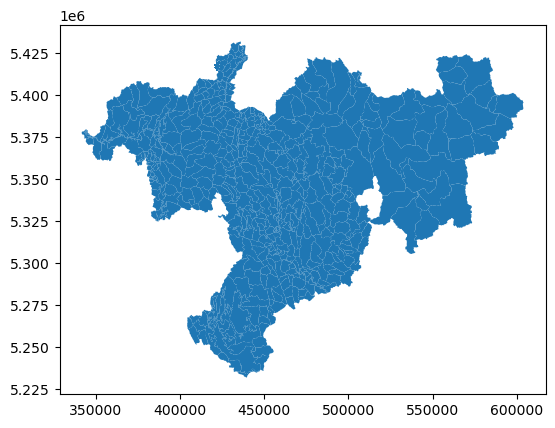

In [6]:
hydrotas.plot()

In [7]:
my_hydrotas = hydrotas.to_crs('epsg:4326')

In [8]:
my_hydrotas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

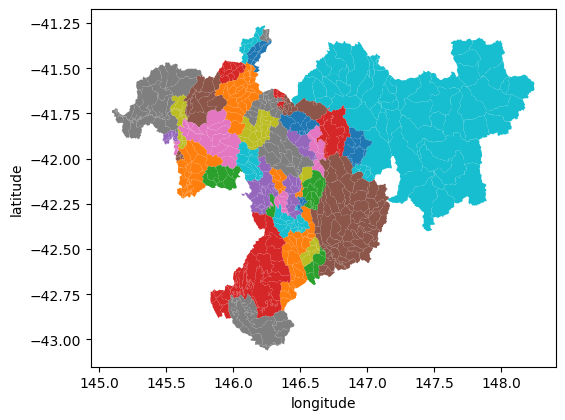

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
my_hydrotas.plot(ax=ax, column='CatchName')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.show()

In [10]:
subcatchments = my_hydrotas.dissolve(by='SLEIPSYS')

In [13]:
subcatchments = subcatchments.drop(columns=['Area_sqkm', 'CentrLat', 'CentrLong', 'Storage', 'ModelID', 'ModelName', 'CatchName', 'CatchID'])

In [18]:
subcatchments = subcatchments.reset_index()

In [19]:
subcatchments

,SLEIPSYS,geometry
0,Derwent,"POLYGON Z ((146.45315 -42.73301 0.00000, 146.4..."
1,Gordon Collingwood,"MULTIPOLYGON Z (((146.18591 -43.02840 0.00000,..."
2,King,"POLYGON Z ((145.62206 -42.21994 0.00000, 145.6..."
3,Mersey Forth,"POLYGON Z ((146.10797 -41.93234 0.00000, 146.1..."
4,Pieman Anthony,"POLYGON Z ((146.02220 -42.01659 0.00000, 146.0..."
5,South Esk,"POLYGON Z ((147.64940 -42.24513 0.00000, 147.6..."
6,Yolande,"POLYGON Z ((145.62164 -42.00090 0.00000, 145.6..."


<AxesSubplot:>

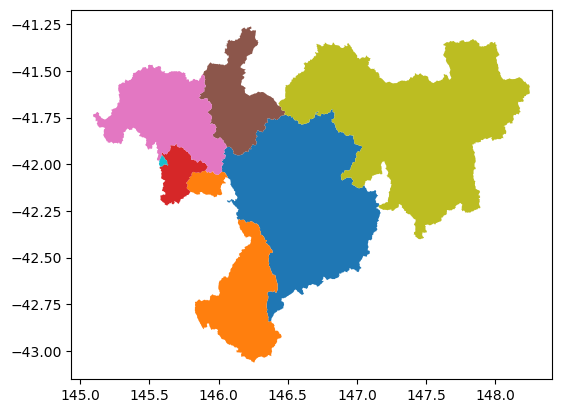

In [20]:
subcatchments.plot(column='SLEIPSYS')

In [21]:
subcatchments.to_file('/Users/irv033/Desktop/hydro-subcatchments.shp')

/Users/irv033/opt/anaconda3/envs/shapefiles/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
